In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [3]:
train_features_with_label = pd.read_csv("train_features_with_label.csv")
test_features_with_label = pd.read_csv("test_features_with_label.csv")
print(train_features_with_label.shape, test_features_with_label.shape)

(5000, 1025) (1000, 1025)


In [4]:
train_features = np.array(train_features_with_label)[:,:-1]
train_label = np.array(train_features_with_label)[:,-1]

test_features = np.array(test_features_with_label)[:,:-1]
test_label = np.array(test_features_with_label)[:,-1]

print(train_features.shape, train_label.shape)
print(test_features.shape, test_label.shape)

(5000, 1024) (5000,)
(1000, 1024) (1000,)


In [5]:
# applying Information Gain
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(n_estimators=10, random_state=10)
rfe = RFE(estimator=est,n_features_to_select=800, verbose=1)
selector = rfe.fit(train_features, train_label)

Fitting estimator with 1024 features.
Fitting estimator with 1023 features.
Fitting estimator with 1022 features.
Fitting estimator with 1021 features.
Fitting estimator with 1020 features.
Fitting estimator with 1019 features.
Fitting estimator with 1018 features.
Fitting estimator with 1017 features.
Fitting estimator with 1016 features.
Fitting estimator with 1015 features.
Fitting estimator with 1014 features.
Fitting estimator with 1013 features.
Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting estimator with 1005 features.
Fitting estimator with 1004 features.
Fitting estimator with 1003 features.
Fitting estimator with 1002 features.
Fitting estimator with 1001 features.
Fitting estimator with 1000 features.
Fitting estimator with 999 features.
Fitting estim

In [6]:
selected_test_features = selector.transform(test_features)
print(selected_test_features.shape)

(1000, 800)


In [8]:
pred = selector.predict(test_features)

In [9]:
print(pred.shape, test_label.shape)

(1000,) (1000,)


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_label, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 8.30%


In [11]:
print(selector.support_)

print(selector.ranking_)

[ True  True  True ... False  True  True]
[ 1  1  1 ... 83  1  1]


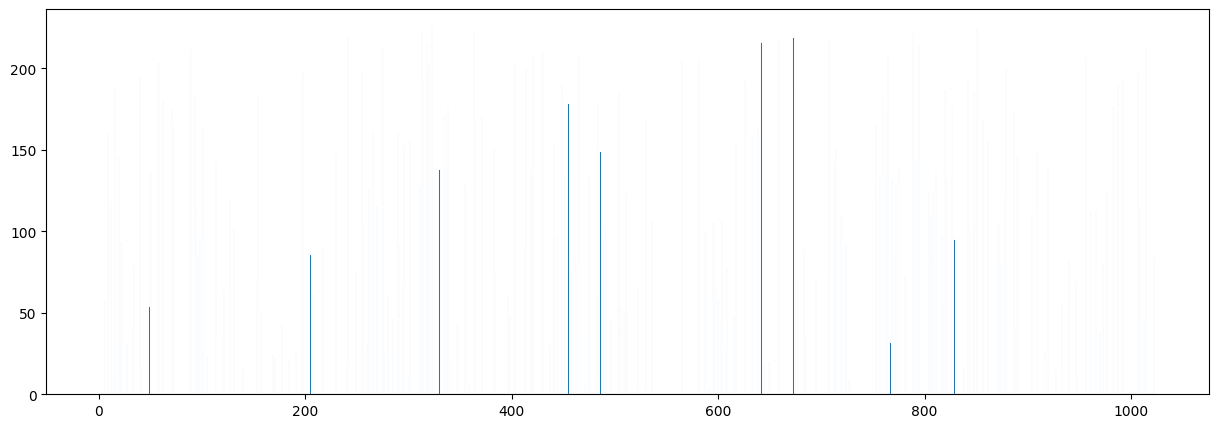

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot()
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(len(selector.ranking_))

# plot
# fig, ax = plt.subplots()

plt.bar(x, selector.ranking_[:], width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 10),
#        ylim=(0, 1), yticks=np.arange(1, 10))

plt.show()